In [1]:
import torch
from torch import nn
import os
import pandas as pd
from torchvision.io import read_image
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Resize, Normalize, Compose
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class DynaSet(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
    
  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = Image.open(img_path)
    # image = read_image(img_path) pytorch/vision#4181
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

transforms_drafts = [
  ToTensor(),
  Resize((25,25)),
] 

transforms = Compose(transforms_drafts)

traind = DynaSet('./dataset/annot.csv', './dataset/',
                 transform=transforms,
                 target_transform=float)

x = torch.stack([i[0] for i in traind])
std, mean = torch.std_mean(x, (0,2,3))
del x  # free memory
print(std, mean)

transforms_drafts.append(Normalize(std=std, mean=mean))

traind = DynaSet('./dataset/annot.csv', './dataset/',
                 transform=transforms,
                 target_transform=float)
traind

tensor([0.2947, 0.2493, 0.2827]) tensor([0.3794, 0.2985, 0.2827])


In [3]:
traind.img_labels[traind.img_labels["label"] == 1]

,file,label
320,pos/puttoleft1.png,1
321,pos/puttoleft2.png,1
322,pos/puttoright1.png,1
323,pos/shift0.png,1
324,pos/shift1.png,1
325,pos/shift2.png,1
326,pos/shift3.png,1
327,pos/shiftwick0.png,1
328,pos/shiftwick1.png,1
329,pos/shiftwick2.png,1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


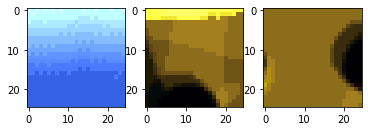

In [4]:
plt.subplot(131)
plt.imshow(np.transpose(traind[219][0].numpy()/2+.5, (1,2,0)))
plt.subplot(132)
plt.imshow(np.transpose(traind[126][0].numpy()/2+.5, (1,2,0)))
plt.subplot(133)
plt.imshow(np.transpose(traind[319][0].numpy()/2+.5, (1,2,0)))

In [5]:
trainl = DataLoader(traind, batch_size=4, shuffle=True)
trainl

In [6]:
traind.img_labels.count()

file     788
label    788
dtype: int64

In [18]:
class DynaNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc = nn.Sequential(
      nn.Linear(1875, 1000),
      nn.ReLU(),
      nn.Linear(1000, 500),
      nn.ReLU(),
      nn.Linear(500, 1),
    )

  def forward(self, x):
    x = self.flatten(x)
    x = self.fc(x)
    return x
DynaNet()

DynaNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=1875, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=1, bias=True)
  )
)

0/10 0.6915
0/21 0.6237
0/32 0.5696
0/43 0.4846
0/54 0.4595
0/65 0.4186
0/76 0.3798
0/87 0.3590
0/98 0.3444
0/109 0.2508
0/120 0.3140
0/131 0.2182
0/142 0.3297
0/153 0.2821
0/164 0.2842
0/175 0.3182
0/186 0.2070
1/10 0.1880
1/21 0.1494
1/32 0.1848
1/43 0.1516
1/54 0.1701
1/65 0.1724
1/76 0.1117
1/87 0.2604
1/98 0.2158
1/109 0.2221
1/120 0.2769
1/131 0.1288
1/142 0.0964
1/153 0.1424
1/164 0.0712
1/175 0.1845
1/186 0.2737
2/10 0.0852
2/21 0.0835
2/32 0.1042
2/43 0.1505
2/54 0.0785
2/65 0.1079
2/76 0.0820
2/87 0.0995
2/98 0.1485
2/109 0.1590
2/120 0.0769
2/131 0.1368
2/142 0.2004
2/153 0.0928
2/164 0.1853
2/175 0.1039
2/186 0.0776
3/10 0.0924
3/21 0.0980
3/32 0.0889
3/43 0.0321
3/54 0.1391
3/65 0.0730
3/76 0.0553
3/87 0.1044
3/98 0.0791
3/109 0.0331
3/120 0.0641
3/131 0.0375
3/142 0.0755
3/153 0.0841
3/164 0.0554
3/175 0.0235
3/186 0.0695
4/10 0.0378
4/21 0.0765
4/32 0.0339
4/43 0.0625
4/54 0.0404
4/65 0.0732
4/76 0.0480
4/87 0.0412
4/98 0.0344
4/109 0.0409
4/120 0.0386
4/131 0.0605
4/142

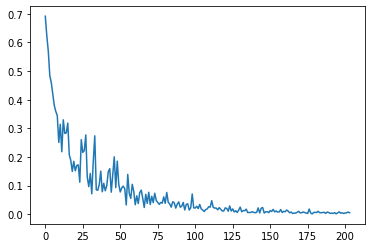

In [20]:
net = DynaNet()
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(net.parameters(), lr=1e-5)

step = 11
running_losses = []
for epoch in range(12):
  running_loss = 0.
  for i, (b, l) in enumerate(trainl):
    net.train()
    optim.zero_grad()
    y = net(b)
    loss = loss_fn(y.squeeze(), l)
    loss.backward()
    optim.step()
    running_loss += loss.item()
    if i % step == step-1:
      running_losses.append(running_loss/step)
      print(f"{epoch}/{i} {running_losses[-1]:.4f}")
      running_loss = 0.

plt.plot(running_losses)

(640, 800, 3)

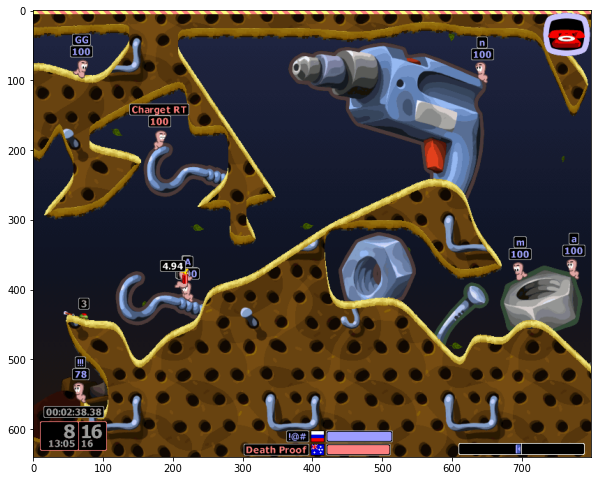

In [34]:
testimg = cv2.cvtColor(cv2.imread("./img/target.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(testimg)
plt.plot()
testimg.shape

In [35]:
kernel = 25
stride = 2
testd = []
for xi in range(0, len(testimg), stride):
  for yi in range(0, len(testimg[xi]), stride):
    padd = np.zeros((kernel,kernel,3), np.uint8)
    targ = testimg[xi:xi+kernel,yi:yi+kernel,:]
    s = targ.shape
    padd[:s[0], :s[1], :] = targ
    testd.append(padd)
len(testd)

128000

In [36]:
rr = [None] * len(testd)
with torch.no_grad():
  for i in range(len(testd)):
    net.eval()
    r = net(transforms(testd[i]).unsqueeze(0))
    rr[i] = r
    
top = np.argsort(rr)[::-1][:100]
topim = []
for idx in top:
  topim.append(testd[idx])

Top matches. Can be used as training data (false positives especially).

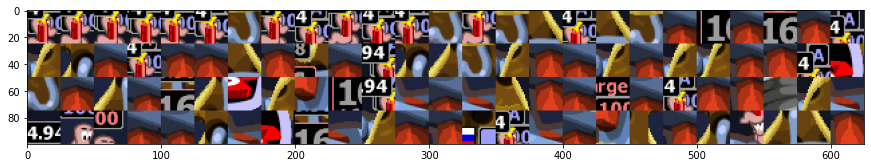

In [37]:
np.shape(topim)
plt.figure(figsize=(15,15))
plt.imshow(np.vstack([np.concatenate(topim[i:i+25], axis=1) for i in range(0, len(topim), 25)]))

In [41]:
np.array(rr)[top]

/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_40505/3998133665.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.array(rr)[top]
/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_40505/3998133665.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(rr)[top]


array([tensor([[5.8535]]), tensor([[4.8181]]), tensor([[4.4024]]),
       tensor([[4.2990]]), tensor([[3.6949]]), tensor([[1.8401]]),
       tensor([[0.1761]]), tensor([[0.0202]]), tensor([[-0.0337]]),
       tensor([[-0.0488]]), tensor([[-0.1135]]), tensor([[-0.3187]]),
       tensor([[-0.3680]]), tensor([[-0.4429]]), tensor([[-0.6831]]),
       tensor([[-0.8251]]), tensor([[-0.8682]]), tensor([[-0.8814]]),
       tensor([[-0.8972]]), tensor([[-0.9274]]), tensor([[-0.9387]]),
       tensor([[-0.9478]]), tensor([[-0.9485]]), tensor([[-0.9660]]),
       tensor([[-0.9871]]), tensor([[-0.9918]]), tensor([[-1.0772]]),
       tensor([[-1.0853]]), tensor([[-1.1066]]), tensor([[-1.1759]]),
       tensor([[-1.1858]]), tensor([[-1.1905]]), tensor([[-1.1959]]),
       tensor([[-1.1997]]), tensor([[-1.2063]]), tensor([[-1.2142]]),
       tensor([[-1.2298]]), tensor([[-1.2385]]), tensor([[-1.2637]]),
       tensor([[-1.2839]]), tensor([[-1.3332]]), tensor([[-1.3571]]),
       tensor([[-1.3717]]), 

In [39]:
np.diff(sorted(np.array(rr)[top], reverse=True))

/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_40505/3005372722.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.diff(sorted(np.array(rr)[top], reverse=True))
/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_40505/3005372722.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.diff(sorted(np.array(rr)[top], reverse=True))


array([tensor([[-1.0355]]), tensor([[-0.4157]]), tensor([[-0.1034]]),
       tensor([[-0.6041]]), tensor([[-1.8548]]), tensor([[-1.6640]]),
       tensor([[-0.1559]]), tensor([[-0.0539]]), tensor([[-0.0152]]),
       tensor([[-0.0647]]), tensor([[-0.2052]]), tensor([[-0.0492]]),
       tensor([[-0.0750]]), tensor([[-0.2401]]), tensor([[-0.1421]]),
       tensor([[-0.0431]]), tensor([[-0.0132]]), tensor([[-0.0158]]),
       tensor([[-0.0301]]), tensor([[-0.0113]]), tensor([[-0.0091]]),
       tensor([[-0.0007]]), tensor([[-0.0175]]), tensor([[-0.0211]]),
       tensor([[-0.0048]]), tensor([[-0.0854]]), tensor([[-0.0081]]),
       tensor([[-0.0212]]), tensor([[-0.0693]]), tensor([[-0.0099]]),
       tensor([[-0.0047]]), tensor([[-0.0054]]), tensor([[-0.0037]]),
       tensor([[-0.0066]]), tensor([[-0.0079]]), tensor([[-0.0157]]),
       tensor([[-0.0086]]), tensor([[-0.0252]]), tensor([[-0.0202]]),
       tensor([[-0.0493]]), tensor([[-0.0239]]), tensor([[-0.0146]]),
       tensor([[-0.0

In [60]:
# sigmoid for logits to probabilities
x = torch.nn.Sigmoid()(torch.stack(sorted([torch.squeeze(r) for r in rr], reverse=True)))
x[:10], x[-10:]

(tensor([0.9971, 0.9920, 0.9879, 0.9866, 0.9758, 0.8630, 0.5439, 0.5050, 0.4916,
         0.4878]),
 tensor([4.7693e-08, 4.6391e-08, 4.6371e-08, 4.5703e-08, 4.5468e-08, 4.3620e-08,
         4.3371e-08, 3.9904e-08, 3.4827e-08, 3.3022e-08]))

In [15]:
# x = topim[4:10:2]
# for i in range(len(x)):
#   cv2.imwrite(f'./new/phone{i+9}.png', cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))

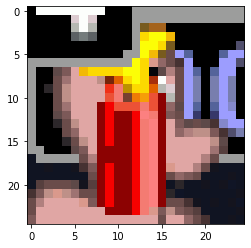

In [40]:
plt.imshow(topim[0])

In [17]:
# cv2.imwrite("./dataset/pos/amazing2.png", cv2.imread("./dataset/pos/amazing.png"))